In [116]:
import h5py
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
#matplotlib.rcParams.update({'font.size': 15})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (6,4)})
import pandas as pd
import seaborn as sns
from copy import deepcopy
import warnings

import sys
import os
import subprocess
import glob
from collections import defaultdict
import scipy as sp
from scipy import special
from itertools import product

from scipy.io import savemat

In [233]:
hertz_pred = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/hertz_pred/*")
lj_pred = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/lj_pred/*")
hertz_val = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/hertz_val/*")
lj_val = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/lj_val/*")
hertz_val = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/hertz_val/*")
hertz_temp = glob.glob(f"/home/ian/Documents/Data//MD_LV_paper_data/temp_hertz/*dt-1e-3*seed-5*vs-10.*")
lj_temp = glob.glob(f"/home/ian/Documents/Data/MD_LV_paper_data/temp_lj/*dt-1e-3*")

In [234]:
figure_path = "/home/ian/Documents/Data/MD_LV_paper_figures/"

In [235]:
len(hertz_pred), len(lj_pred), len(hertz_val), len(lj_val), len(hertz_temp), len(lj_temp)

(1, 1, 11, 11, 11, 21)

In [225]:
def plot_msd(dic):
    plt.figure()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dVs = np.abs(dic["dVs"])
        mdVs = sorted(dVs)
        norm = dic["Norm"]
        MSD = dic["MSD"]
        time = dic["time"]
        N = dic["real"]
        # dVs = np.linspace(2.0, 11.0, 10)

        cmap = cm.viridis
        nor = colors.LogNorm(vmin=mdVs[1], vmax=mdVs[-1])

        sm = cm.ScalarMappable(cmap=cmap, norm=nor)

        for i in np.arange(len(MSD)):
            M = norm[i]/N
            mask = MSD[i]/norm[i]
            mask = np.where(np.abs(M-1) < 0.1, mask, np.nan)
            nans = np.argwhere(np.isnan(mask))
            if dVs[i] == mdVs[0]:
                color = "k"
                plt.plot(time, mask, "--", color=color, label=r"$\tilde V$")
            else:
                color = cmap(nor(dVs[i]))
                plt.plot(time, mask, "-", color=color)
            
        plt.legend()

        plt.colorbar(sm, label=r"$-\chi$")
        plt.ylabel(r"$\langle \mathcal{MSD} \rangle$")
        plt.xlabel(r"$t$")
        plt.yscale('log')
        plt.xscale('log')

def plot_msd_therm(dic):
    plt.figure()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dVs = dic["temp"]
        mdVs = sorted(dVs)
        norm = dic["Norm"]
        MSD = dic["MSD"]
        time = dic["time"]
        N = dic["real"]
        # dVs = np.linspace(2.0, 11.0, 10)

        cmap = cm.viridis_r
        nor = colors.LogNorm(vmin=mdVs[0], vmax=mdVs[-1])

        sm = cm.ScalarMappable(cmap=cmap, norm=nor)

        for i in np.arange(len(MSD)):
            M = norm[i]/N
            mask = MSD[i]/norm[i]
            mask = np.where(np.abs(M-1) < 0.1, mask, np.nan)
            nans = np.argwhere(np.isnan(mask))
            if dVs[i] == mdVs[-1]:
                color = "k"
                plt.plot(time, mask, "--", color=color, label=r"$\tilde V$")
            else:
                color = cmap(nor(dVs[i]))
                plt.plot(time, mask, "-", color=color)
            
        plt.legend()

        plt.colorbar(sm, label=r"$k_B T$")
        plt.ylabel(r"$\langle \mathcal{MSD} \rangle$")
        plt.xlabel(r"$t$")
        plt.yscale('log')
        plt.xscale('log')

In [226]:
def plot_Ib(dic):

    plt.figure()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dVs = -dic["dVs"]
        mdVs = sorted(dVs)
        norm = dic["Norm"]
        time = dic["time"]
        N = dic["real"]

        cmap = cm.viridis
        nor = colors.LogNorm(vmin=mdVs[0], vmax=mdVs[-1])

        sm = cm.ScalarMappable(cmap=cmap, norm=nor)

        for i in range(1, len(norm)):
            M = norm[i]/N
            plt.plot(time, np.abs(M-1), color=cmap(nor(dVs[i])))

        plt.colorbar(sm, label=r"$-\chi$")
        plt.ylabel(r"$\mid \mathcal{M} - 1 \mid$")
        plt.xlabel(r"$t$")
        plt.yscale('log')

In [227]:
def plot_q0(dic):

    plt.figure()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dVs = np.abs(dic["dVs"])
        mdVs = sorted(dVs)
        norm = dic["Norm"]
        Q = dic["Q"][:,0]
        time = dic["time"]
        N = dic["real"]
        # dVs = np.linspace(2.0, 11.0, 10)

        cmap = cm.viridis
        nor = colors.LogNorm(vmin=mdVs[1], vmax=mdVs[-1])

        sm = cm.ScalarMappable(cmap=cmap, norm=nor)

        for i in np.arange(len(Q)):
            M = norm[i]/N
            mask = Q[i]/norm[i]
            mask = np.where(np.abs(M-1) < 0.1, mask, np.nan)
            nans = np.argwhere(np.isnan(mask))
            if dVs[i] == mdVs[0]:
                color = "k"
                plt.plot(time, mask, "--", color=color, label=r"$\tilde V$")
            else:
                color = cmap(nor(dVs[i]))
                plt.plot(time, mask, "-", color=color)
                
        plt.legend()

        plt.colorbar(sm, label=r"$-\chi$")
        plt.ylabel(r"$\mathcal{Q}(0.1)$")
        plt.xlabel(r"$t$")
        plt.xscale('log')

def plot_q0_therm(dic):

    plt.figure()
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        dVs = dic["temp"]
        mdVs = sorted(dVs)
        norm = dic["Norm"]
        Q = dic["Q"][:,0]
        time = dic["time"]
        N = dic["real"]
        # dVs = np.linspace(2.0, 11.0, 10)

        cmap = cm.viridis_r
        nor = colors.LogNorm(vmin=mdVs[0], vmax=mdVs[-1])

        sm = cm.ScalarMappable(cmap=cmap, norm=nor)

        for i in np.arange(len(Q)):
            M = norm[i]/N
            mask = Q[i]/norm[i]
            mask = np.where(np.abs(M-1) < 0.1, mask, np.nan)
            nans = np.argwhere(np.isnan(mask))
            if dVs[i] == mdVs[-1]:
                color = "k"
                plt.plot(time, mask, "--", color=color, label=r"$\tilde V$")
            else:
                color = cmap(nor(dVs[i]))
                plt.plot(time, mask, "-", color=color)
                
        plt.legend()

        plt.colorbar(sm, label=r"$k_B T$")
        plt.ylabel(r"$\mathcal{Q}(0.1)$")
        plt.xlabel(r"$t$")
        plt.xscale('log')

In [237]:
def collect_h5_files_into_data(files, val=False):
    data = {}
    if val:
        for i, f in enumerate(sorted(files)):
            with h5py.File(f, "r") as f:
                if i == 0:
                    data["dVs"] = []
                    data["Norm"] = []
                    data["MSD"] = []
                    data["Q"] = []
                    data["time"] = f["data"]["time"][:]
                    data["real"] = f["real"][0]
                data["dVs"].append(1.0 - f["meta"]["vscale"][()])
                data["Norm"].append(f["data"]["Norm"][0])
                data["MSD"].append(f["data"]["MSD"][0])
                data["Q"].append(f["data"]["Q"][0])
        data["dVs"] = np.array(data["dVs"])
        data["Norm"] = np.array(data["Norm"])
        data["MSD"] = np.array(data["MSD"])
        data["Q"] = np.array(data["Q"])
    else:
        for f in sorted(files):
            with h5py.File(f, "r") as f:
                data["dVs"] = f["param"]["dVs"][:]
                data["Norm"] = f["data"]["Norm"][:]
                data["MSD"] = f["data"]["MSD"][:]
                data["Q"] = f["data"]["Q"][:]
                data["time"] = f["data"]["time"][:]
                data["real"] = f["real"][0]
    return data

def collect_h5_files_into_data_therm(files):
    data = {}
    for i, f in enumerate(sorted(files)):
        with h5py.File(f, "r") as f:
            if i == 0:
                data["temp"] = []
                data["Norm"] = []
                data["MSD"] = []
                data["Q"] = []
                data["time"] = f["data"]["time"][:]
                data["real"] = f["real"][0]
            temp = f["meta"]["temp"][()]
            if temp < 1e-2:
                continue
            data["temp"].append(temp)
            data["Norm"].append(f["data"]["Norm"][0])
            data["MSD"].append(f["data"]["MSD"][0])
            data["Q"].append(f["data"]["Q"][0])
    data["temp"] = np.array(data["temp"])
    data["Norm"] = np.array(data["Norm"])
    data["MSD"] = np.array(data["MSD"])
    data["Q"] = np.array(data["Q"])
    return data

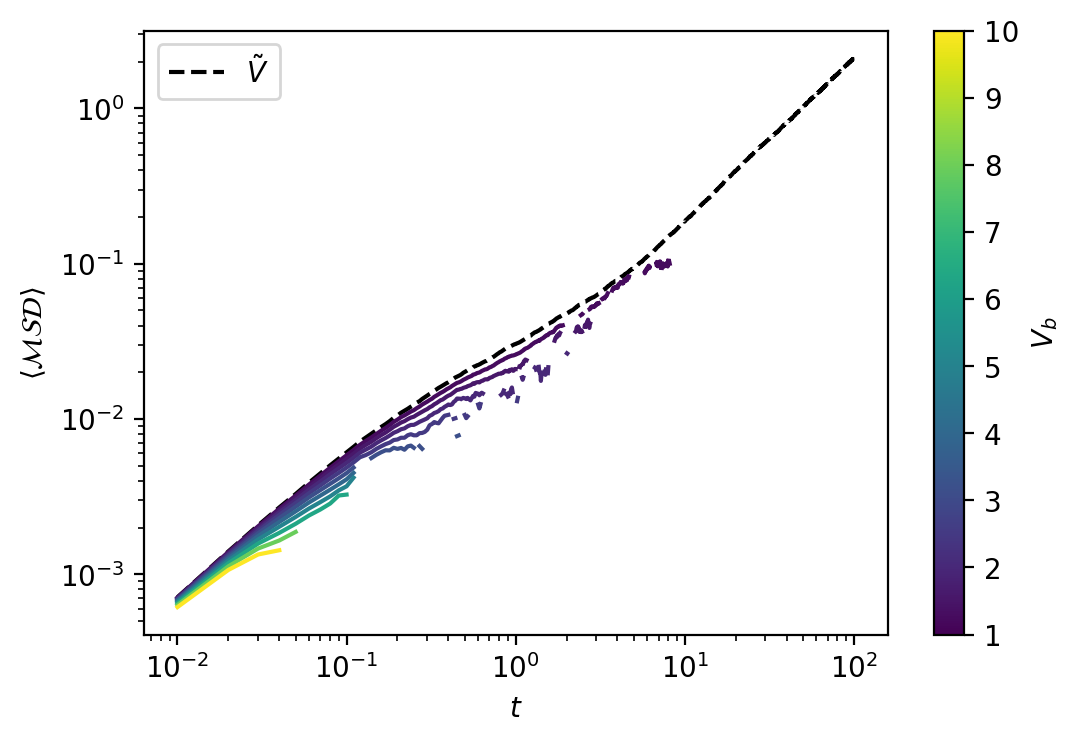

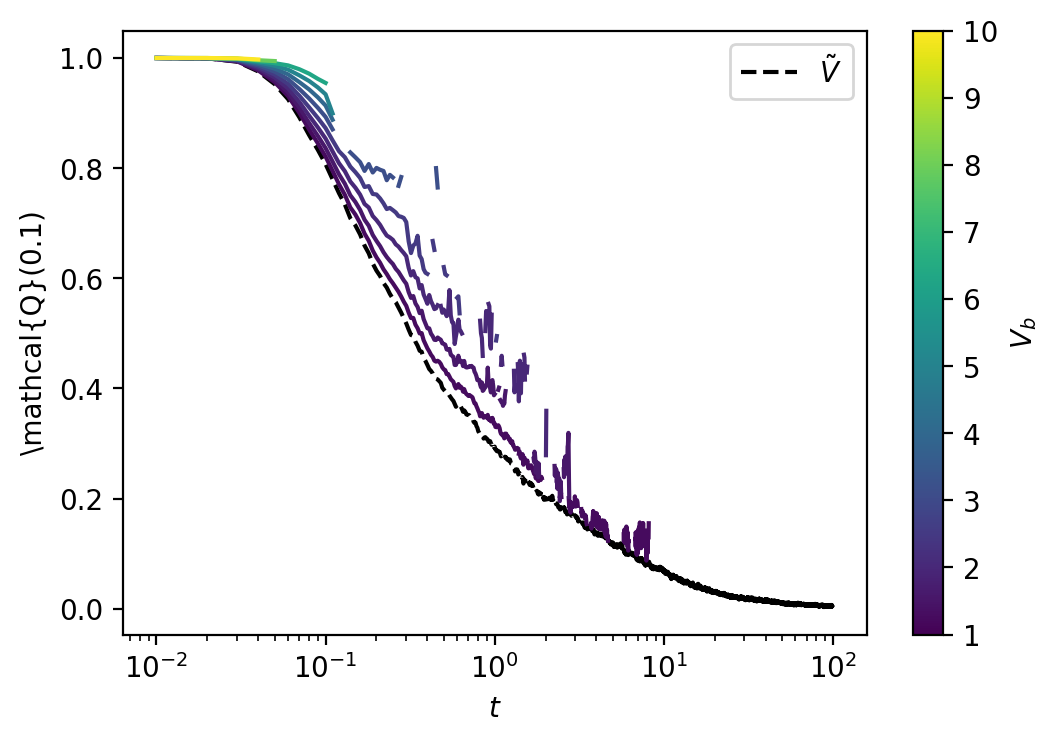

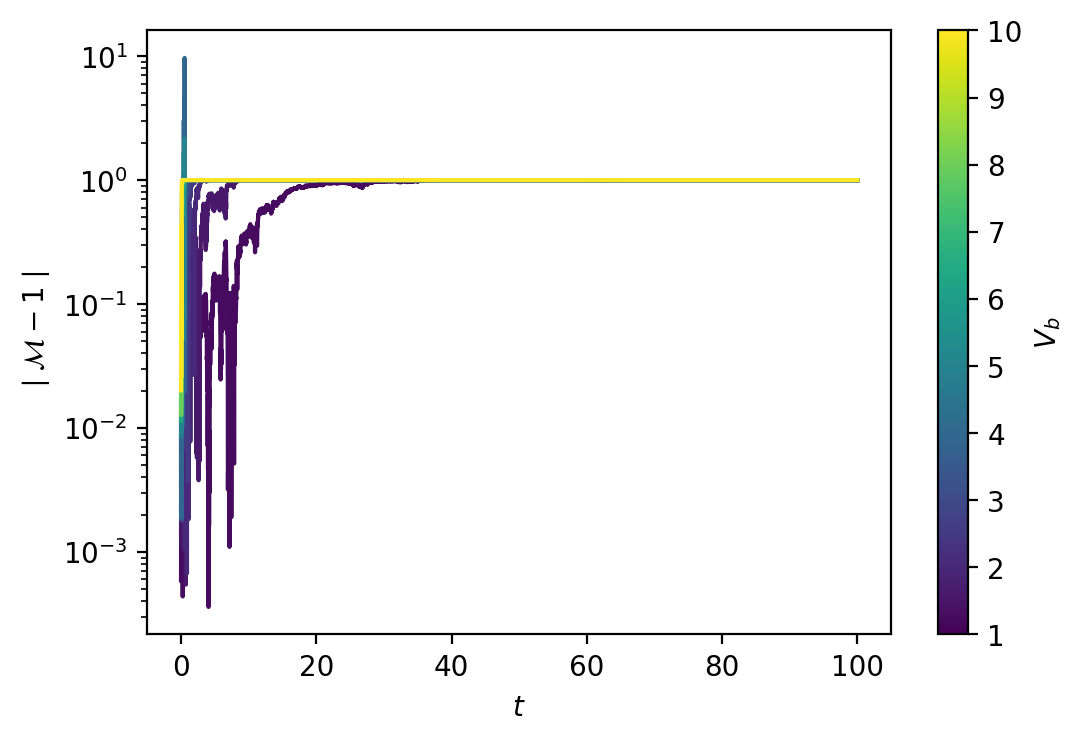

In [179]:
data = collect_h5_files_into_data(hertz_pred)
plot_msd(data)
plot_q0(data)
plot_Ib(data)

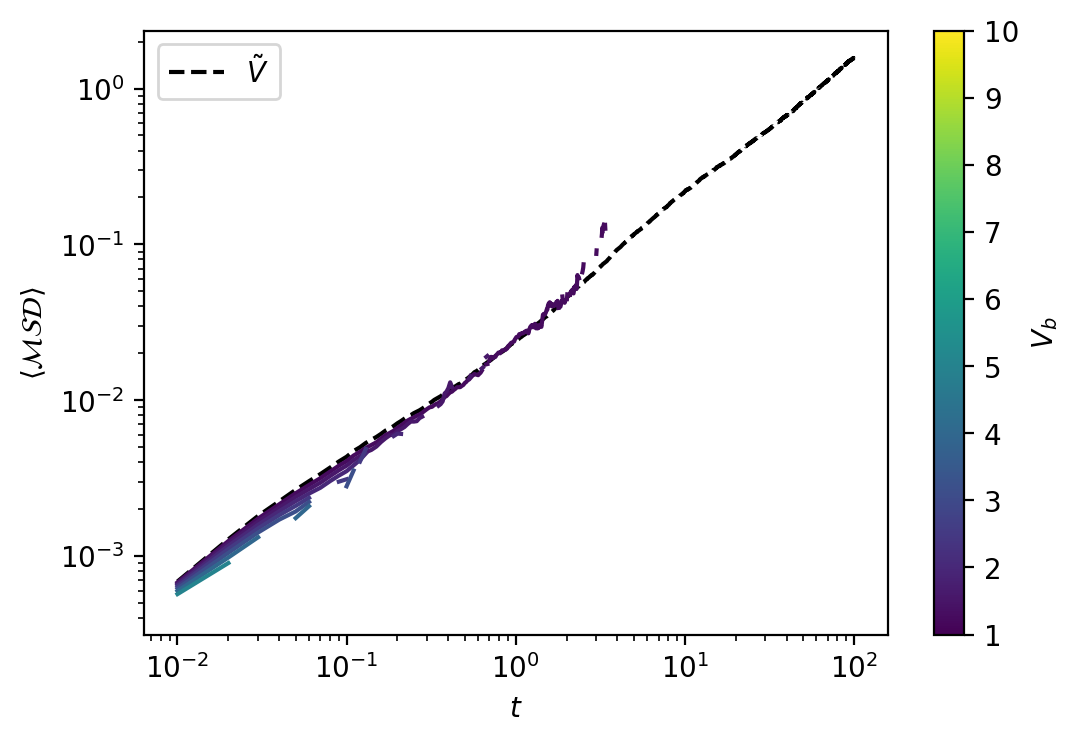

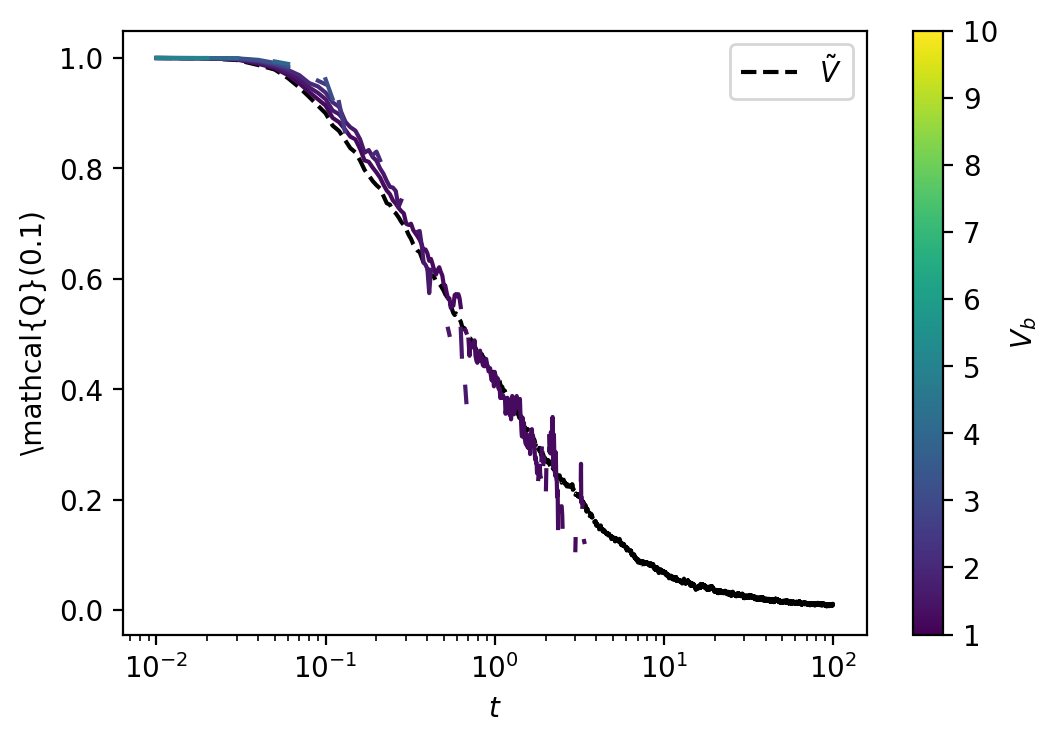

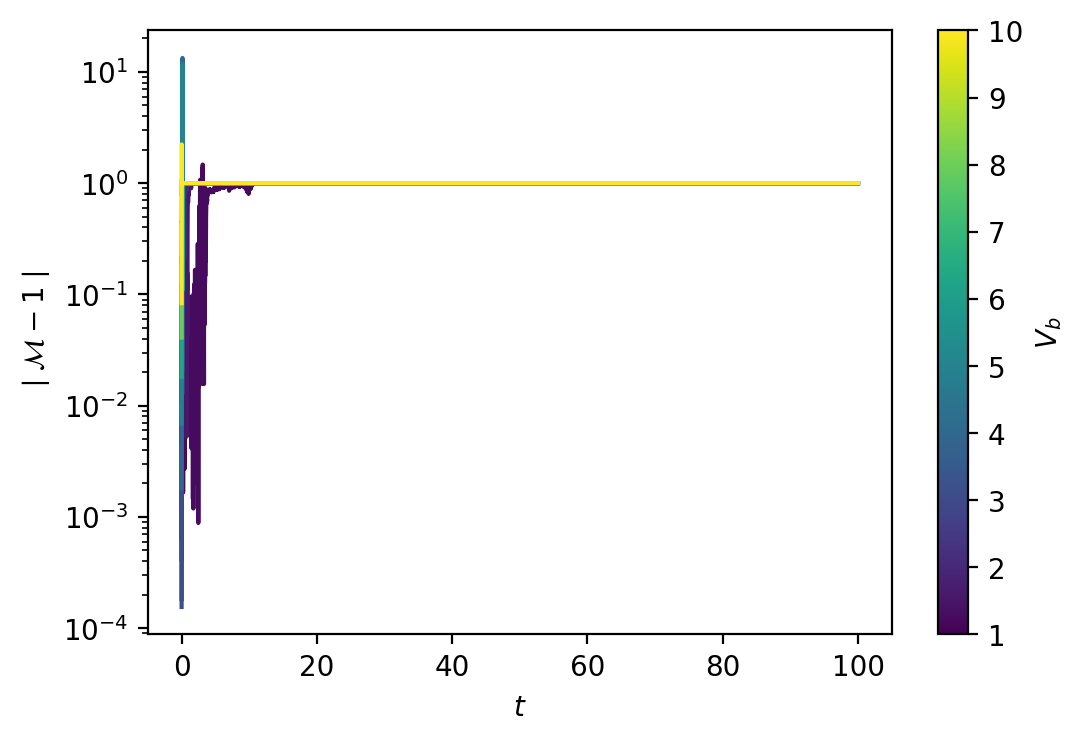

In [180]:
data = collect_h5_files_into_data(lj_pred)
plot_msd(data)
plot_q0(data)
plot_Ib(data)

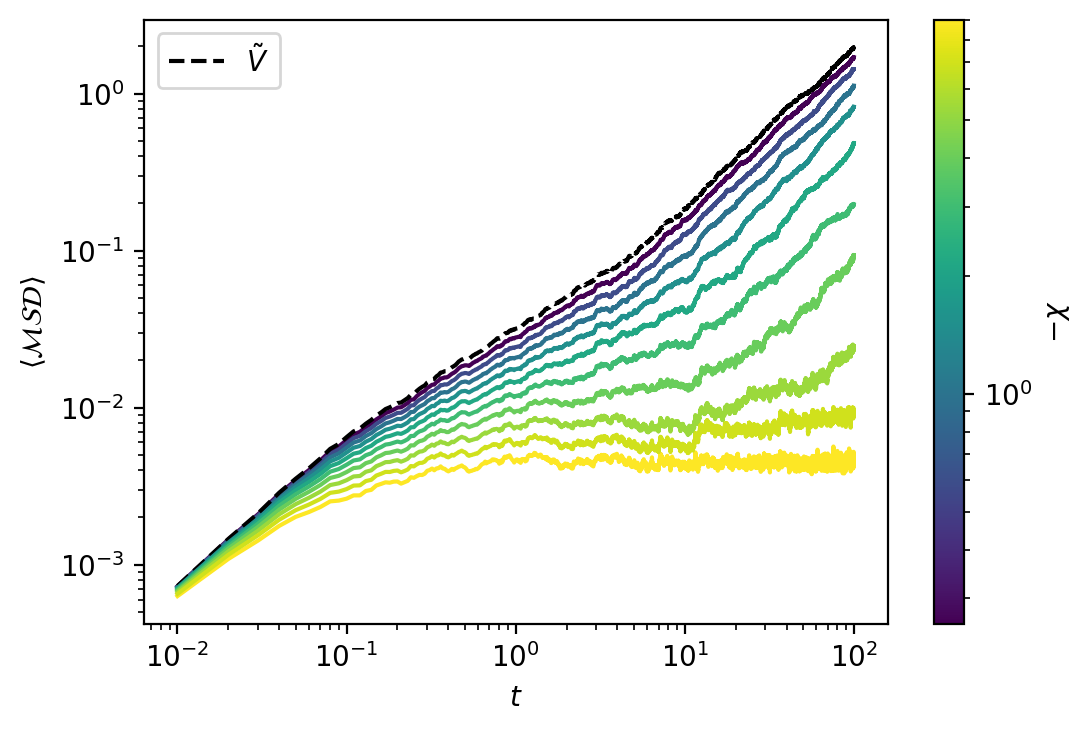

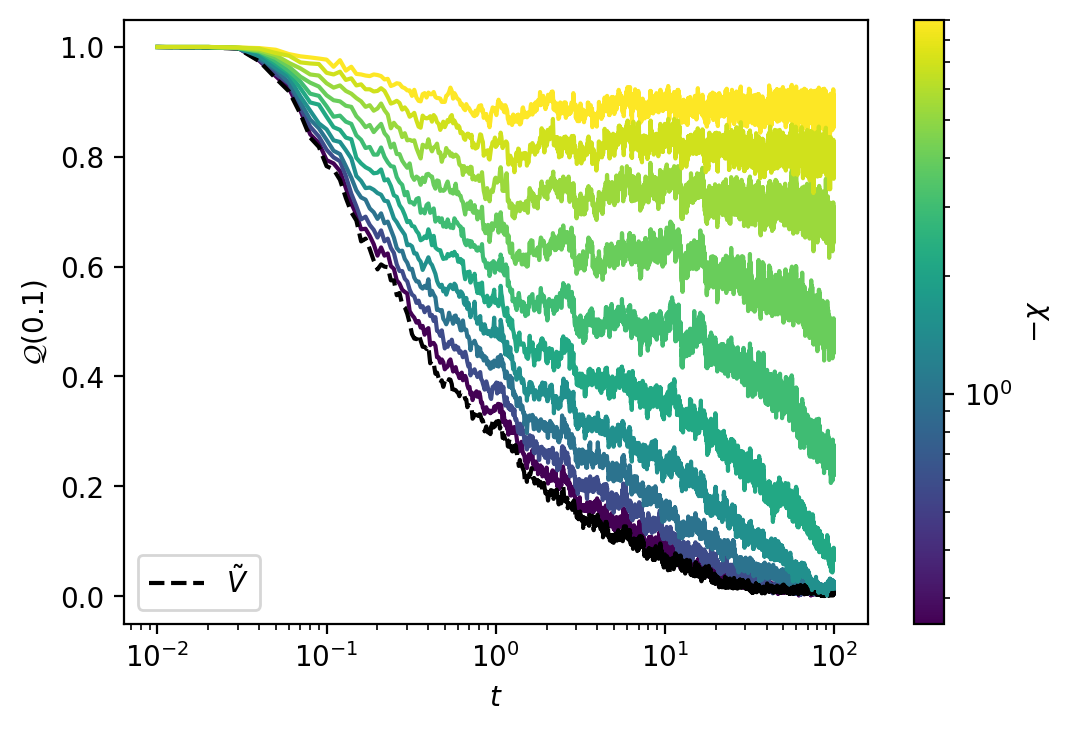

In [229]:
data = collect_h5_files_into_data(hertz_val, val=True)
plot_msd(data)
plt.savefig(figure_path+"hertz_val_msd.pdf", bbox_inches='tight')
plot_q0(data)
plt.savefig(figure_path+"hertz_val_q0.pdf", bbox_inches='tight')

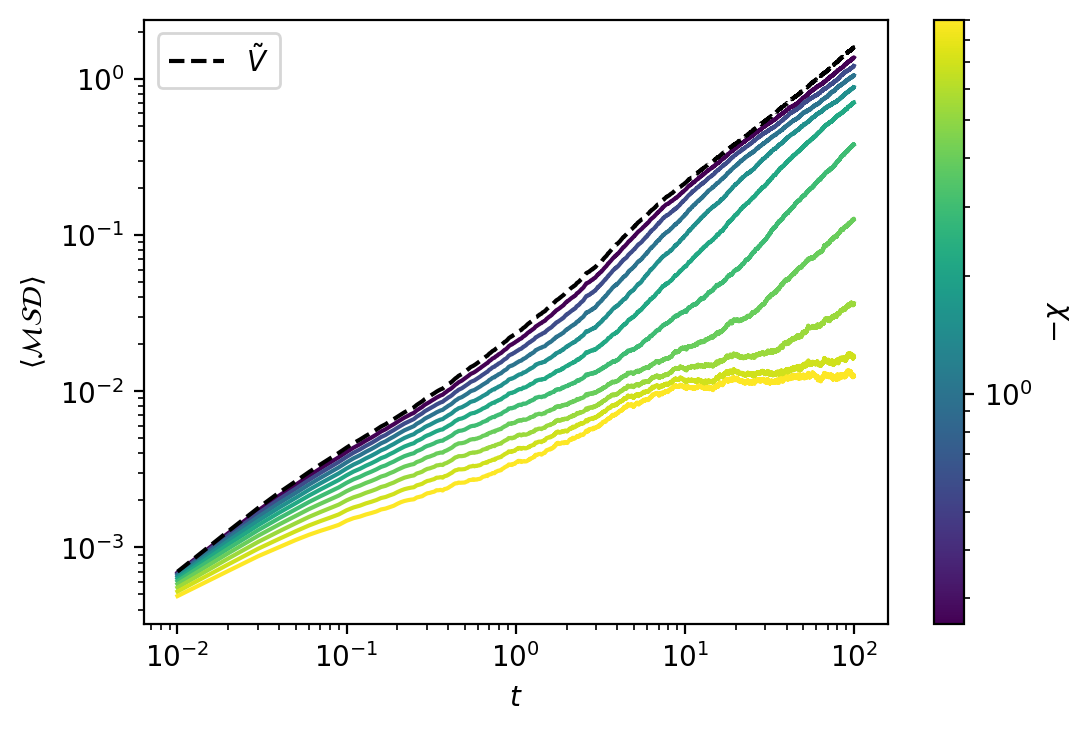

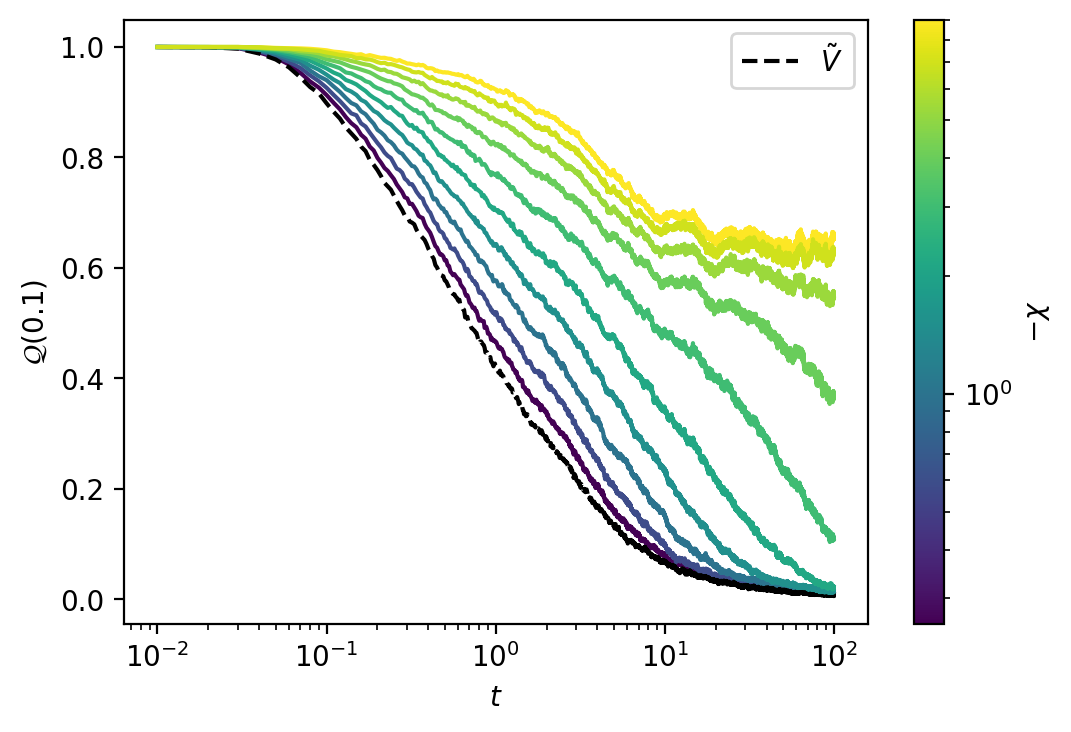

In [230]:
data = collect_h5_files_into_data(lj_val, val=True)
plot_msd(data)
plt.savefig(figure_path+"lj_val_msd.pdf", bbox_inches='tight')
plot_q0(data)
plt.savefig(figure_path+"lj_val_q0.pdf", bbox_inches='tight')

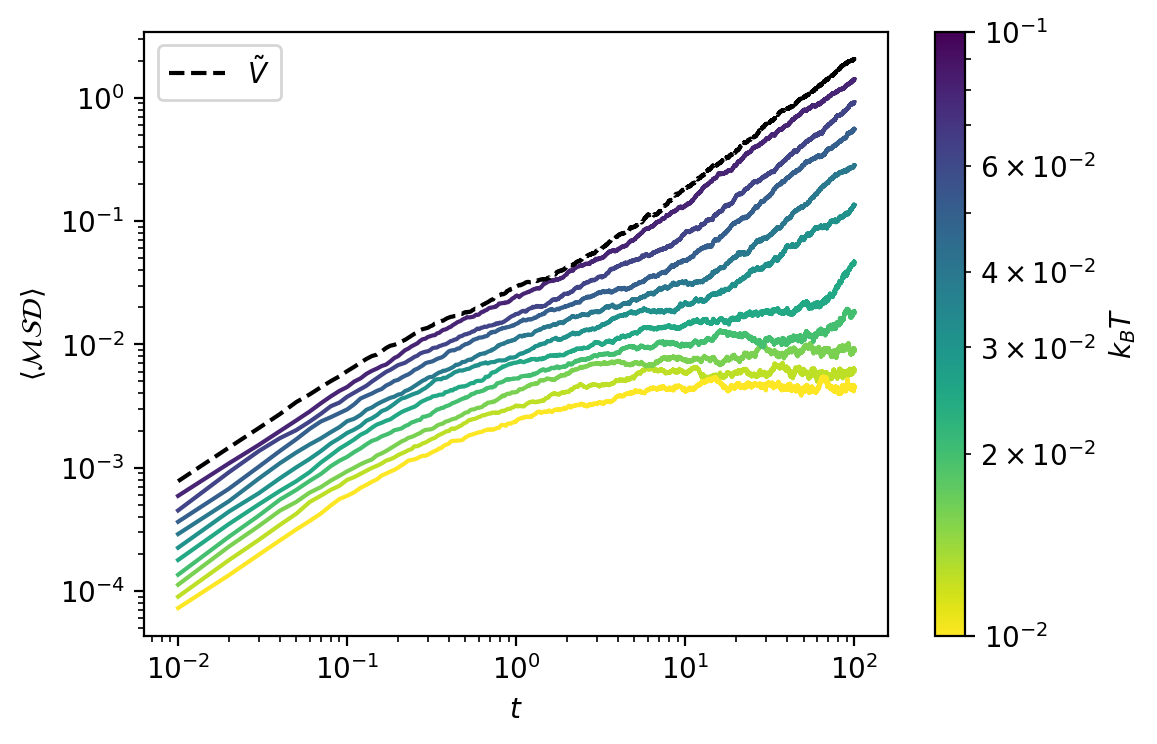

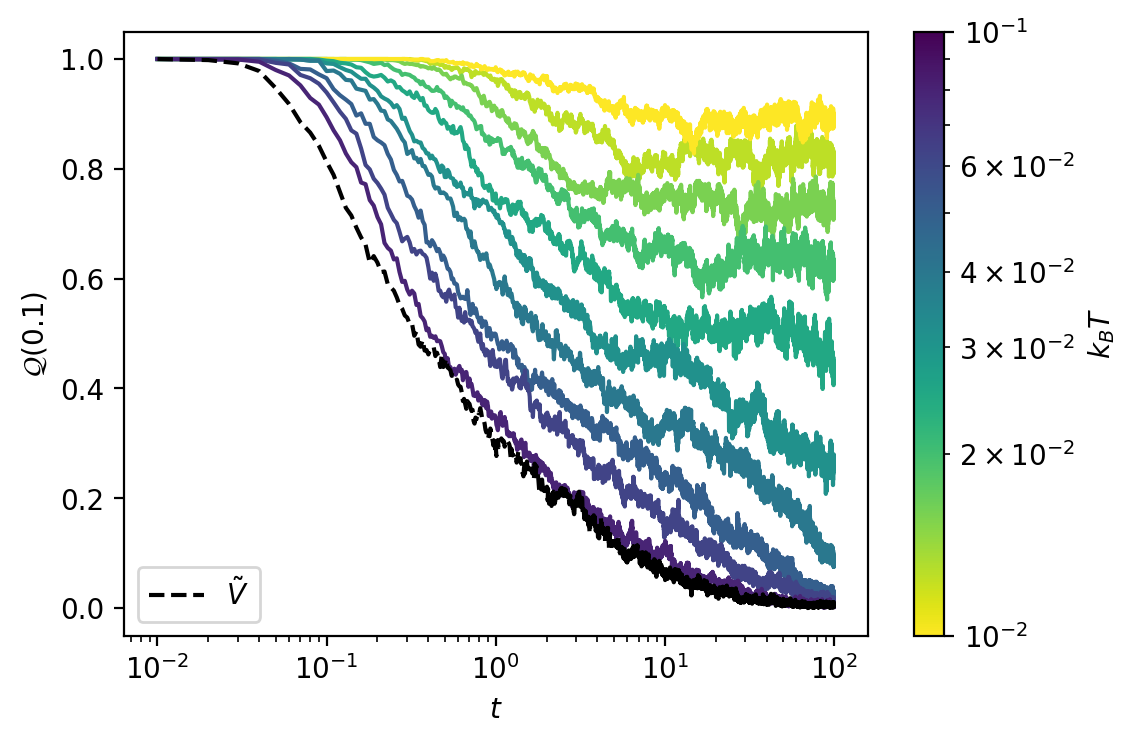

In [240]:
data = collect_h5_files_into_data_therm(hertz_temp)
plot_msd_therm(data)
plt.savefig(figure_path+"hertz_therm_msd.pdf", bbox_inches='tight')
plot_q0_therm(data)
plt.savefig(figure_path+"hertz_therm_q0.pdf", bbox_inches='tight')

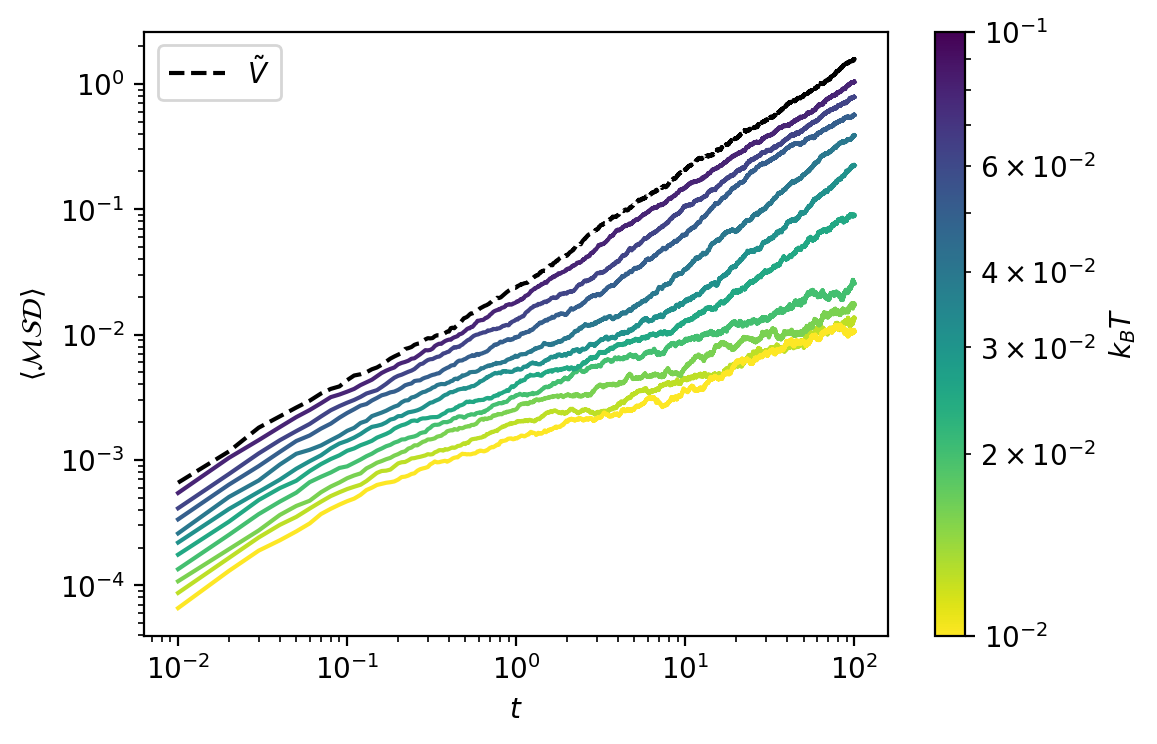

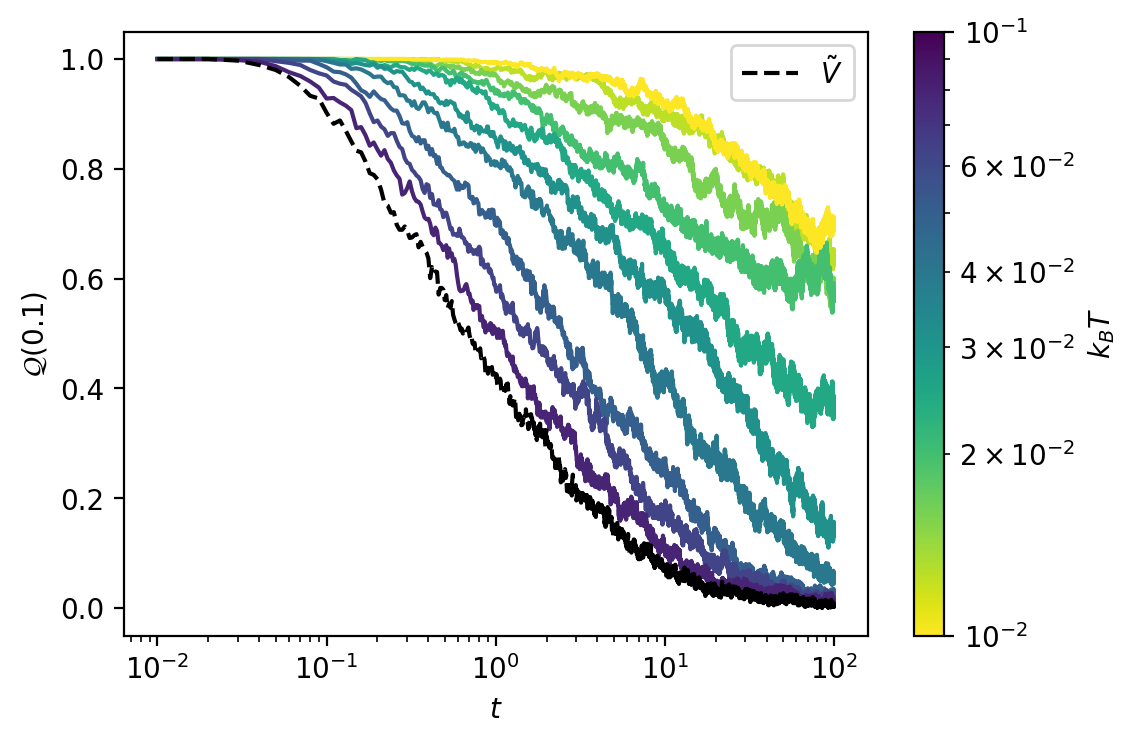

In [241]:
data = collect_h5_files_into_data_therm(lj_temp)
plot_msd_therm(data)
plt.savefig(figure_path+"lj_therm_msd.pdf", bbox_inches='tight')
plot_q0_therm(data)
plt.savefig(figure_path+"lj_therm_q0.pdf", bbox_inches='tight')